## *A real estate company wants to predict the prices for the future based on the data available. This way it will help them adjust their budget, change the way they work so as to earn profit and also help them decide where to invest in. As a Data Scientist, I will explore the data available, perform preprocessing, check for manipulation and finally apply and evaluate machine learning algorithms to see which algorithm provides the best result.*

## Reading the data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as plt

In [2]:
housing_data = pd.read_csv("data.csv")

In [3]:
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Attribute description
    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285962,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702023,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D36345D30>,
      dtype=object)

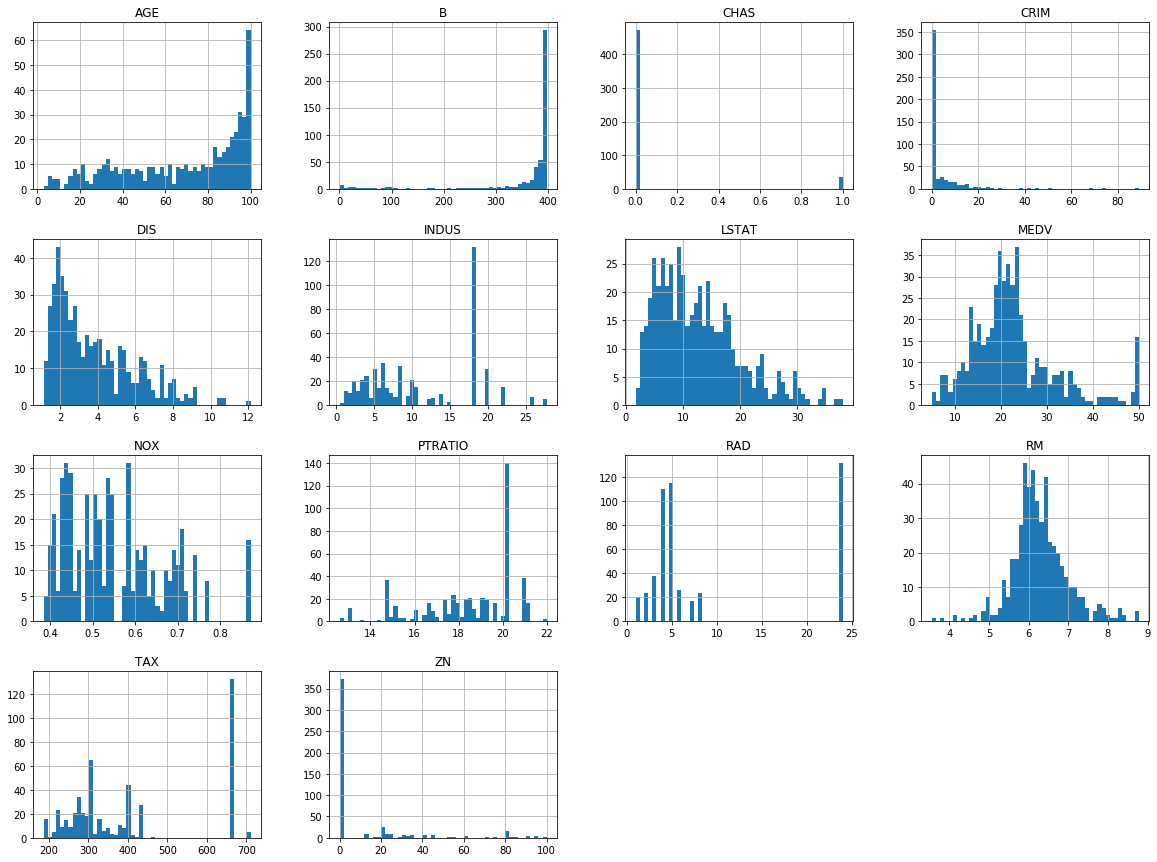

In [6]:
housing_data.hist(bins=50,figsize=(20,15))

## Splitting using manual method(numpy)

In [7]:
def splitting(data,test_ratio):
    np.random.seed(123)
    ratio = np.random.permutation(len(data))
    print(ratio)
    test_size = int(len(data)*test_ratio)
    test_indices = ratio[:test_size]
    train_indices = ratio[test_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [8]:
train, test = splitting(housing_data,0.2)

[410  85 280 422 199 364   5 415 209 284 201 337  34 160 495  11 494 261
 317 474 134 372 179 282 369 485 458  59 332 102 101 275 427  36  75 263
  93 443  33 226 190   9 407 162  48 285  15 313  24 375 274 185  13 383
 171 446 148 384  55 389 131 502 155 465 216 288  82 432  72 191 107 272
  26 249 460 469 376  49 308 374 227 440 320 212 211 333 447  66 327 188
 436 189 125  42 200  41 478 229 159 196 345 467 203 441 172  95  54 449
 346 351 114 483 138 132 431 343   0 408 150 486 362 258 286 437  20 120
 242 335 142 170 241 379 367 388 156 433  31 401  21 484 164 184 416  79
 370 397 121 310  91 151 426 472 273  52 181 452 381 192 482 104 500 481
 202 412 456 204 442 306   6 147 178 329 298 299 267 182 479 175 297 326
 223 221 264 165 248 291 260  38 341 318 236  12 435 289  30 144 425 463
 157 287 347 246 328 444 352 234  81 105 378 231  37  19  29  78 455 276
 393 470  71  94 498 491  35 128  74 217  53  22 173 145 434 413 166 457
 163 237  90 402 210 448 501 423 277 487 403   4 39

In [9]:
print(f"The number of rows in training dataset is: {len(train)}\nThe number of rows in test dataset is: {len(test)}")

The number of rows in training dataset is: 405
The number of rows in test dataset is: 101


## Splitting using sklearn

In [10]:
from sklearn.model_selection import train_test_split
train_data , test_data = train_test_split(housing_data, test_size = 0.2, random_state = 121)
print(f"The number of rows in training dataset is: {len(train_data)}\nThe number of rows in test dataset is: {len(test_data)}")

The number of rows in training dataset is: 404
The number of rows in test dataset is: 102


We need to make sure that the values in 'CHAS' variable is appropriately distributed in both test and train dataset. For this, I will make use of stratified shuffling from sklearn package which will make sure that all possible values are included in both train and test

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state = 121)
for train_index, test_index in sss.split(housing_data, housing_data['CHAS']):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

In [12]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [13]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [14]:
#copying the training dataset to main dataset as we need to work with the training data
housing_data = strat_train_set.copy()

## Correlation

In [15]:
corr_matrix = housing_data.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.724798
ZN         0.333895
B          0.322021
DIS        0.253325
CHAS       0.161892
AGE       -0.360807
RAD       -0.397783
CRIM      -0.397820
NOX       -0.430715
INDUS     -0.475387
TAX       -0.478921
PTRATIO   -0.507044
LSTAT     -0.739273
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D39BD6278>,
      dtype=object)

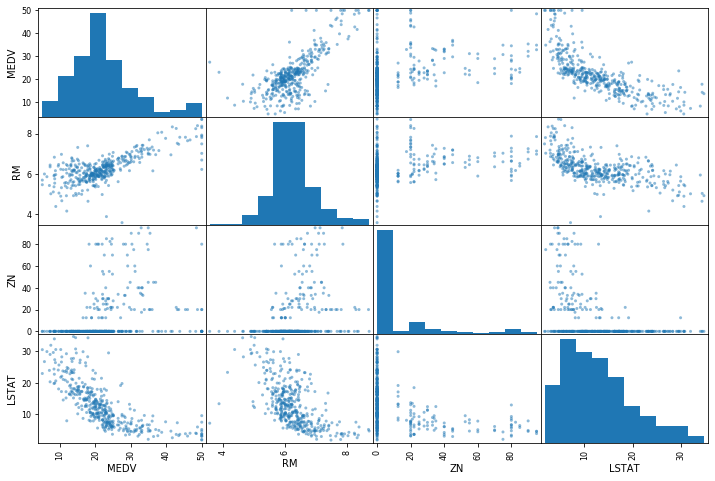

In [16]:
from pandas.plotting import scatter_matrix
attr = ["MEDV", "RM","ZN","LSTAT"]
scatter_matrix(housing_data[attr], figsize=(12,8))

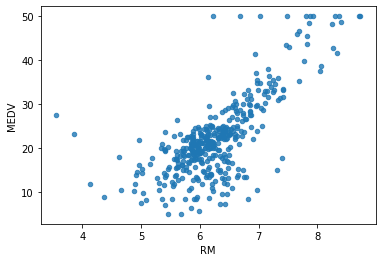

In [17]:
housing_data.plot(kind = "scatter", x = "RM", y="MEDV", alpha=0.8)

In [18]:
housing_data["TAX_PER_ROOM"] = housing_data["TAX"]/housing_data["RM"]
housing_data["TAX_PER_ROOM"]

254     51.571709
247     53.003534
215     44.807506
445    103.111937
245     58.876004
          ...    
438    112.215670
356    107.211848
261     35.106383
339     37.426901
441    103.965033
Name: TAX_PER_ROOM, Length: 404, dtype: float64

In [19]:
corr_matrix = housing_data.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV            1.000000
RM              0.724798
ZN              0.333895
B               0.322021
DIS             0.253325
CHAS            0.161892
AGE            -0.360807
RAD            -0.397783
CRIM           -0.397820
NOX            -0.430715
INDUS          -0.475387
TAX            -0.478921
PTRATIO        -0.507044
TAX_PER_ROOM   -0.559289
LSTAT          -0.739273
Name: MEDV, dtype: float64

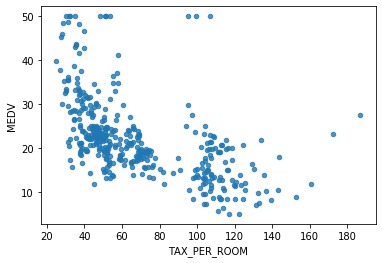

In [20]:
housing_data.plot(kind = "scatter", x = "TAX_PER_ROOM", y="MEDV", alpha=0.8)

## Handling Missing data

1. Remove the missing data points
2. Remove the whole attribute/column/row
3. Set some value(0,mean or median)

In [21]:
housing_label = strat_train_set["MEDV"].copy()
housing_data = strat_train_set.drop("MEDV", axis = 1)

In [22]:
#calculating number if NA values in each attributes
housing_data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         1
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [23]:
#Since there is a strong correlation, we cannot drop the column. However we will see how every step is executed if need be

#Option 1

x = housing_data.dropna(subset = ['RM'])
x.shape

(403, 13)

In [24]:
#option 2

y = housing_data.drop('RM', axis = 1)
y.shape

(404, 12)

In [25]:
#option 3

z = housing_data['RM'].fillna(housing_data['RM'].median()) #can be mean or 0 as well
z

254    6.108
247    6.226
215    6.182
445    6.459
245    5.605
       ...  
438    5.935
356    6.212
261    7.520
339    5.985
441    6.406
Name: RM, Length: 404, dtype: float64

In [26]:
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,403.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.871600,10.699257,11.471238,0.069307,0.561435,6.260499,68.976733,3.742731,9.698020,412.732673,18.422030,356.592896,12.924134
std,9.141635,22.325069,6.863481,0.254290,0.119389,0.704667,28.612090,2.120311,8.756587,168.349447,2.174528,91.511674,7.177466
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.086097,0.000000,5.560000,0.000000,0.453000,5.876500,45.550000,2.064700,4.000000,283.250000,17.000000,375.085000,7.362500
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.176000,78.950000,3.057250,5.000000,345.000000,19.000000,391.190000,11.645000
75%,3.716457,12.500000,18.100000,0.000000,0.647000,6.591500,94.525000,5.141475,24.000000,666.000000,20.200000,396.097500,17.167500
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.770000


# making the 3rd option automated using sklearn

In [27]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy = "median")

#this will work for all the attributes in the dataset - replace all the NA values in any column as its column's median value
impute.fit(housing_data)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [28]:
#median of each attribute after imputing
impute.statistics_

array([2.90250e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.17600e+00, 7.89500e+01, 3.05725e+00, 5.00000e+00, 3.45000e+02,
       1.90000e+01, 3.91190e+02, 1.16450e+01])

In [29]:
X_impute = impute.transform(housing_data)

In [30]:
housing_data_tr = pd.DataFrame(X_impute, columns = housing_data.columns)
housing_data_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.871600,10.699257,11.471238,0.069307,0.561435,6.260290,68.976733,3.742731,9.698020,412.732673,18.422030,356.592896,12.924134
std,9.141635,22.325069,6.863481,0.254290,0.119389,0.703805,28.612090,2.120311,8.756587,168.349447,2.174528,91.511674,7.177466
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.086097,0.000000,5.560000,0.000000,0.453000,5.876750,45.550000,2.064700,4.000000,283.250000,17.000000,375.085000,7.362500
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.176000,78.950000,3.057250,5.000000,345.000000,19.000000,391.190000,11.645000
75%,3.716457,12.500000,18.100000,0.000000,0.647000,6.590750,94.525000,5.141475,24.000000,666.000000,20.200000,396.097500,17.167500
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.770000


# Designing Sklearn

The objects in scikit learn are -
1. Estimators - It is used to estimate something provided there are some conditions. Imputation is a good example of estimators. 
This includes a fit and the transform method where fit method fits the dataset with some conditions and calculate the internal parameters. 

2. Transformers - It learns from the fit method and calculates a task by taking input values. It has a function "fit_transform" which will fit and transform in a single step

3. Predictors - LinearRegression has fit() and predict() method along with the accuracy score of the model.

## Feature scaling
This is used to bring out one common scale for every interger value/column

1. min-max or Normalisation method

(value - min)/(max - min) The range would be from 0 to 1.
sklearn has MinMaxScaler to perform this step

2. Standardization

(value - mean)/SD
The result would have a variance of 1 and mean would be equal to the original mean.
sklearn has StandardScaler to perform this step


## Creating pipeline

Right from imputing with median values, feature scaling to machine learning, everything is automated using pipeline

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline_data = Pipeline([
    ('Imputer', SimpleImputer(strategy = "median")),
    ('std_scaler', StandardScaler())
])

In [40]:
#converts to numpy array
housing_tr = pipeline_data.fit_transform(housing_data)

In [41]:
#The above step just took the data we fed, started with the imputing and then standardized it with standardscaler
housing_tr

array([[-0.41875995,  3.10801593, -1.14241568, ..., -0.93102374,
         0.39713086, -0.88638691],
       [-0.4025086 ,  0.50681835, -0.81856358, ...,  0.31216477,
         0.21386715, -0.38698521],
       [-0.40234978, -0.4798428 , -0.12855435, ...,  0.08194468,
         0.40522729, -0.48184363],
       ...,
       [-0.36553835,  0.41712188, -1.09427551, ..., -2.49652038,
         0.34767701, -0.79013351],
       [-0.41801737, -0.4798428 , -0.91630272, ...,  0.81864898,
         0.44100474, -0.44417926],
       [ 0.64100532, -0.4798428 ,  0.9669994 , ...,  0.81864898,
         0.32130892,  0.92010805]])

In [42]:
housing_tr.shape

(404, 13)

# Model Selection

### Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(housing_tr, housing_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
some_data = housing_data.iloc[:5]
some_labels = housing_label.iloc[:5]

data_prepared = pipeline_data.transform(some_data)
lr.predict(data_prepared)

array([23.53442312, 20.13867832, 24.48740831, 12.98657011, 13.6618684 ])

In [107]:
some_labels

254    21.9
247    20.5
215    25.0
445    11.8
245    18.5
Name: MEDV, dtype: float64

## Model Evaluation for Linear Regression

In [52]:
from sklearn.metrics import mean_squared_error
predicted_data = lr.predict(housing_tr)
lr_mse = mean_squared_error(housing_label, predicted_data)
lr_RMSE = np.sqrt(lr_mse)

In [54]:
lr_RMSE

4.380934534654132

There a small amount of root mean squared error which normally would be acceptable. We will check for other algorithms as well

### Decision Trees

In [56]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(housing_tr,housing_label)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [58]:
dtr.predict(data_prepared)

array([21.9, 20.5, 25. , 11.8, 18.5])

In [61]:
some_labels

254    21.9
247    20.5
215    25.0
445    11.8
245    18.5
Name: MEDV, dtype: float64

## Model Evaluation for Decision Trees

In [64]:
predicted_data_dtr = dtr.predict(housing_tr)
dtr_mse = mean_squared_error(housing_label, predicted_data_dtr)
dtr_RMSE = np.sqrt(dtr_mse)

In [66]:
dtr_RMSE

0.0

The model showed 0 root mean squared error. This is an example of overfitting. The model basically learned the noise too to fit it well which is not good

### Random Forest

In [85]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(housing_tr, housing_label)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [86]:
rfr.predict(data_prepared)

array([22.287, 20.825, 24.373, 11.524, 19.092])

In [87]:
some_labels

254    21.9
247    20.5
215    25.0
445    11.8
245    18.5
Name: MEDV, dtype: float64

## Model Evaluation for Random Forest

In [88]:
predicted_data_rfr = rfr.predict(housing_tr)
rfr_mse = mean_squared_error(housing_label, predicted_data_rfr)
rfr_RMSE = np.sqrt(rfr_mse)

In [89]:
rfr_RMSE

1.354456348502969

## Cross Validation

**For Decision Trees**

In [75]:
from sklearn.model_selection import cross_val_score

#to increase the utility, we will use scoring as neg_mean_squared_error
cvs_dtr = cross_val_score(dtr, housing_tr, housing_label, scoring = "neg_mean_squared_error", cv = 10)
cv_rmse = np.sqrt(-cvs_dtr)

In [76]:
cv_rmse

array([5.7263831 , 5.82823238, 2.77026898, 3.62154798, 5.0240422 ,
       2.68179045, 3.93741667, 3.2330713 , 3.9887028 , 4.07513803])

**For Linear Regression**

In [79]:
cvs_lr = cross_val_score(lr, housing_tr, housing_label, scoring = "neg_mean_squared_error", cv = 10)
cv_lr_rmse = np.sqrt(-cvs_lr)

In [81]:
cv_lr_rmse

array([5.6961619 , 6.20184926, 4.05148454, 4.14633822, 4.70501226,
       3.90707029, 4.3989854 , 4.29527237, 3.37837636, 3.95108676])

**For Random Forest**

In [91]:
cvs_rfr = cross_val_score(rfr, housing_tr, housing_label, scoring = "neg_mean_squared_error", cv = 10)
cv_rfr_rmse = np.sqrt(-cvs_rfr)

In [92]:
cv_rfr_rmse

array([4.39178583, 4.98267534, 2.64517949, 2.88453076, 3.62277159,
       3.2457145 , 2.91775025, 2.31863485, 2.43109756, 2.78927251])

#### Function to print rmse scores, mean and standard deviation

In [82]:
def details(score):
    print("RMSE: ", score)
    print("Mean: ", score.mean())
    print("Standard deviation: ", score.std())

In [83]:
#For decision tree
details(cv_rmse)

RMSE:  [5.7263831  5.82823238 2.77026898 3.62154798 5.0240422  2.68179045
 3.93741667 3.2330713  3.9887028  4.07513803]
Mean:  4.088659387925705
Standard deviation:  1.0622570401193372


In [84]:
#For Linear regression
details(cv_lr_rmse)

RMSE:  [5.6961619  6.20184926 4.05148454 4.14633822 4.70501226 3.90707029
 4.3989854  4.29527237 3.37837636 3.95108676]
Mean:  4.473163737092431
Standard deviation:  0.8155484943667487


In [93]:
#For Random forest
details(cv_rfr_rmse)

RMSE:  [4.39178583 4.98267534 2.64517949 2.88453076 3.62277159 3.2457145
 2.91775025 2.31863485 2.43109756 2.78927251]
Mean:  3.2229412679719793
Standard deviation:  0.8244738666202572


**We can clearly notice that the Random Forest worked very well as compared to other models. We will consider random forest for our final usage on the whole dataset**

In [105]:
from joblib import dump, load
dump(rfr, 'Model_use.joblib')

['Model_use.joblib']

# Model Testing on test dataset

In [94]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()

**Using Linear regression model**

In [98]:
X_test_prepared_lr = pipeline_data.transform(X_test)
lr_predictions = lr.predict(X_test_prepared_lr)
test_lr_mse = mean_squared_error(Y_test, lr_predictions)
test_lr_rmse = np.sqrt(test_lr_mse)
test_lr_rmse

5.930843252594091

In [102]:
values_lr = pd.DataFrame({"lr_predictions":lr_predictions,"Y_test":Y_test, "Residual": Y_test-lr_predictions})
values_lr.head()

,lr_predictions,Y_test,Residual
109,19.716467,19.4,-0.316467
106,16.950050,19.5,2.549950
82,25.667991,24.8,-0.867991
60,17.594414,18.7,1.105586
179,32.699975,37.2,4.500025


**Using Decision tree model**

In [96]:
X_test_prepared_dtr = pipeline_data.transform(X_test)
dtr_predictions = dtr.predict(X_test_prepared_dtr)
test_dtr_mse = mean_squared_error(Y_test, dtr_predictions)
test_dtr_rmse = np.sqrt(test_dtr_mse)
test_dtr_rmse

5.133435191248166

In [103]:
values_dtr = pd.DataFrame({"dtr_predictions":dtr_predictions,"Y_test":Y_test, "Residual": Y_test-dtr_predictions})
values_dtr.head()

,dtr_predictions,Y_test,Residual
109,27.1,19.4,-7.7
106,22.4,19.5,-2.9
82,22.9,24.8,1.9
60,17.2,18.7,1.5
179,37.9,37.2,-0.7


**Using Random Forest Regressor**

In [97]:
X_test_prepared_rfr = pipeline_data.transform(X_test)
rfr_predictions = rfr.predict(X_test_prepared_rfr)
test_rfr_mse = mean_squared_error(Y_test, rfr_predictions)
test_rfr_rmse = np.sqrt(test_rfr_mse)
test_rfr_rmse

4.2588060844215345

In [104]:
values_rfr = pd.DataFrame({"rfr_predictions":rfr_predictions,"Y_test":Y_test, "Residual": Y_test-rfr_predictions})
values_rfr.head()

,rfr_predictions,Y_test,Residual
109,19.772,19.4,-0.372
106,17.893,19.5,1.607
82,23.322,24.8,1.478
60,19.018,18.7,-0.318
179,33.344,37.2,3.856


## Model Usage

In [112]:
#Here, random forest has been considered as the chosen model
from joblib import dump, load
model_use = load('Model_use.joblib')

features = [data_prepared[0]]
model_use.predict(features)

array([22.287])